In [448]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv


In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
from sklearn.preprocessing import minmax_scale

In [450]:
df = pd.read_csv('../input/car-price-prediction-challenge/car_price_prediction.csv')

In [451]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [452]:
df.shape

(19237, 18)

In [453]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [454]:
df = df.drop(['Prod. year','Drive wheels','Doors','Wheel', 'Color',], axis = 1)
df.head()

,ID,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Airbags
0,45654403,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,12
1,44731507,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,8
2,45774419,8467,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,2
3,45769185,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,0
4,45809263,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,4


In [455]:
df.drop_duplicates(inplace = True)
df.shape

(18924, 13)

In [456]:
df['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [457]:
def handle_levy(value):
    if (value == '-'):
        return np.nan
    else:
        return float(value)
    
df['Levy'] = df['Levy'].apply(handle_levy)
df['Levy'].unique()

array([ 1399.,  1018.,    nan,   862.,   446.,   891.,   761.,   751.,
         394.,  1053.,  1055.,  1079.,   810.,  2386.,  1850.,   531.,
         586.,  1249.,  2455.,   583.,  1537.,  1288.,   915.,  1750.,
         707.,  1077.,  1486.,  1091.,   650.,   382.,  1436.,  1194.,
         503.,  1017.,  1104.,   639.,   629.,   919.,   781.,   530.,
         640.,   765.,   777.,   779.,   934.,   769.,   645.,  1185.,
        1324.,   830.,  1187.,  1111.,   760.,   642.,  1604.,  1095.,
         966.,   473.,  1138.,  1811.,   988.,   917.,  1156.,   687.,
       11714.,   836.,  1347.,  2866.,  1646.,   259.,   609.,   697.,
         585.,   475.,   690.,   308.,  1823.,  1361.,  1273.,   924.,
         584.,  2078.,   831.,  1172.,   893.,  1872.,  1885.,  1266.,
         447.,  2148.,  1730.,   730.,   289.,   502.,   333.,  1325.,
         247.,   879.,  1342.,  1327.,  1598.,  1514.,  1058.,   738.,
        1935.,   481.,  1522.,  1282.,   456.,   880.,   900.,   798.,
      

In [458]:
df.Levy.isnull().sum()

5709

In [459]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,8
2,45774419,8467,NaN,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,2
3,45769185,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,0
4,45809263,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,4


In [460]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [461]:
def handle_Engine_volume(value):
    if 'Turbo' in value:
        value = str(value).split(' ')
        value = value[0]
        return float(value)
    else:
        return float(value)
    
df['Engine volume'] = df['Engine volume'].apply(handle_Engine_volume)
df['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [462]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,8
2,45774419,8467,NaN,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,2
3,45769185,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,0
4,45809263,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,4


In [463]:
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [464]:
df.rename(columns = {'Mileage': 'Mileage_km','Engine volume':'Engine volume_L'}, inplace = True )
df.head()

,ID,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume_L,Mileage_km,Cylinders,Gear box type,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,8
2,45774419,8467,NaN,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,2
3,45769185,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,0
4,45809263,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,4


In [465]:
def handle_Mileage_km(value):
    value = str(value).split(' ')
    value = value[0]
    return float(value)

df['Mileage_km'] = df['Mileage_km'].apply(handle_Mileage_km)
df['Mileage_km'].unique()

array([186005., 192000., 200000., ..., 140607., 307325., 186923.])

In [466]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume_L,Mileage_km,Cylinders,Gear box type,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,8
2,45774419,8467,NaN,HONDA,FIT,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,2
3,45769185,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,0
4,45809263,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,4


In [467]:
df['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [468]:
def handle_Manufacturer(value):
    if 'სხვა' in value:
        return np.nan
    else:
        return str(value)
    
df['Manufacturer'] = df['Manufacturer'].apply(handle_Manufacturer)
df['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', nan, 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              13215 non-null  float64
 3   Manufacturer      18922 non-null  object 
 4   Model             18924 non-null  object 
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume_L   18924 non-null  float64
 9   Mileage_km        18924 non-null  float64
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Airbags           18924 non-null  int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 2.0+ MB


In [470]:
df.shape

(18924, 13)

In [471]:
df.dropna(inplace = True)
df.shape

(13215, 13)

In [472]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume_L,Mileage_km,Cylinders,Gear box type,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,8
3,45769185,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,0
4,45809263,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,4
5,45802912,39493,891.0,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,4


In [473]:
def remove_0_mileage(value):
    if (value == 0.0 ):
        return np.nan
    else:
        return float(value)
    
df['Mileage_km'] = df['Mileage_km'].apply(remove_0_mileage)
df['Mileage_km'].value_counts()

90000.0     45
120000.0    41
150000.0    41
130000.0    38
110000.0    38
            ..
534501.0     1
62621.0      1
105022.0     1
62707.0      1
186923.0     1
Name: Mileage_km, Length: 6733, dtype: int64

In [474]:
df['Airbags'].value_counts()

12    4711
4     4703
0     1778
8      734
10     482
6      404
2      212
16      49
7       44
9       27
11      23
5       19
14      15
1        6
3        5
15       2
13       1
Name: Airbags, dtype: int64

In [475]:
df.dropna(inplace = True)
df.shape

(12872, 13)

In [476]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume_L,Mileage_km,Cylinders,Gear box type,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,8
3,45769185,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,0
4,45809263,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,4
5,45802912,39493,891.0,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,4


In [477]:
df['ID'].value_counts()

45654403    1
45769429    1
45801815    1
45624811    1
45804670    1
           ..
45733586    1
45769677    1
45809316    1
45801987    1
45813273    1
Name: ID, Length: 12872, dtype: int64

In [478]:
df = df.drop(['ID'], axis = 1)
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume_L,Mileage_km,Cylinders,Gear box type,Airbags
0,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,12
1,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,8
3,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,0
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,4
5,39493,891.0,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,4


In [479]:
df.describe()

,Price,Levy,Engine volume_L,Mileage_km,Cylinders,Airbags
count,12872.000000,12872.000000,12872.000000,1.287200e+04,12872.000000,12872.000000
mean,17566.021986,903.655298,2.308406,3.862281e+05,4.502175,6.872203
std,19425.663445,458.572298,0.866907,2.087766e+07,1.111454,4.431637
min,1.000000,87.000000,0.000000,1.300000e+01,1.000000,0.000000
25%,4077.000000,640.000000,1.800000,7.149950e+04,4.000000,4.000000
50%,13877.000000,781.000000,2.000000,1.210000e+05,4.000000,4.000000
75%,23521.000000,1058.000000,2.500000,1.811610e+05,4.000000,12.000000
max,872946.000000,11714.000000,20.000000,2.147484e+09,16.000000,16.000000


In [480]:
df_scaled = minmax_scale(df[['Price', 'Levy']], feature_range = (0,1))
df['Price_Norm'] = df_scaled[:,0]
df['Levy_Norm'] = df_scaled[:,1]
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume_L,Mileage_km,Cylinders,Gear box type,Airbags,Price_Norm,Levy_Norm
0,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,12,0.015267,0.112841
1,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,8,0.019039,0.080072
3,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,0,0.004131,0.066655
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,4,0.013432,0.030876
5,39493,891.0,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,4,0.045240,0.069149


<Axes: xlabel='Leather interior', ylabel='Price_Norm'>

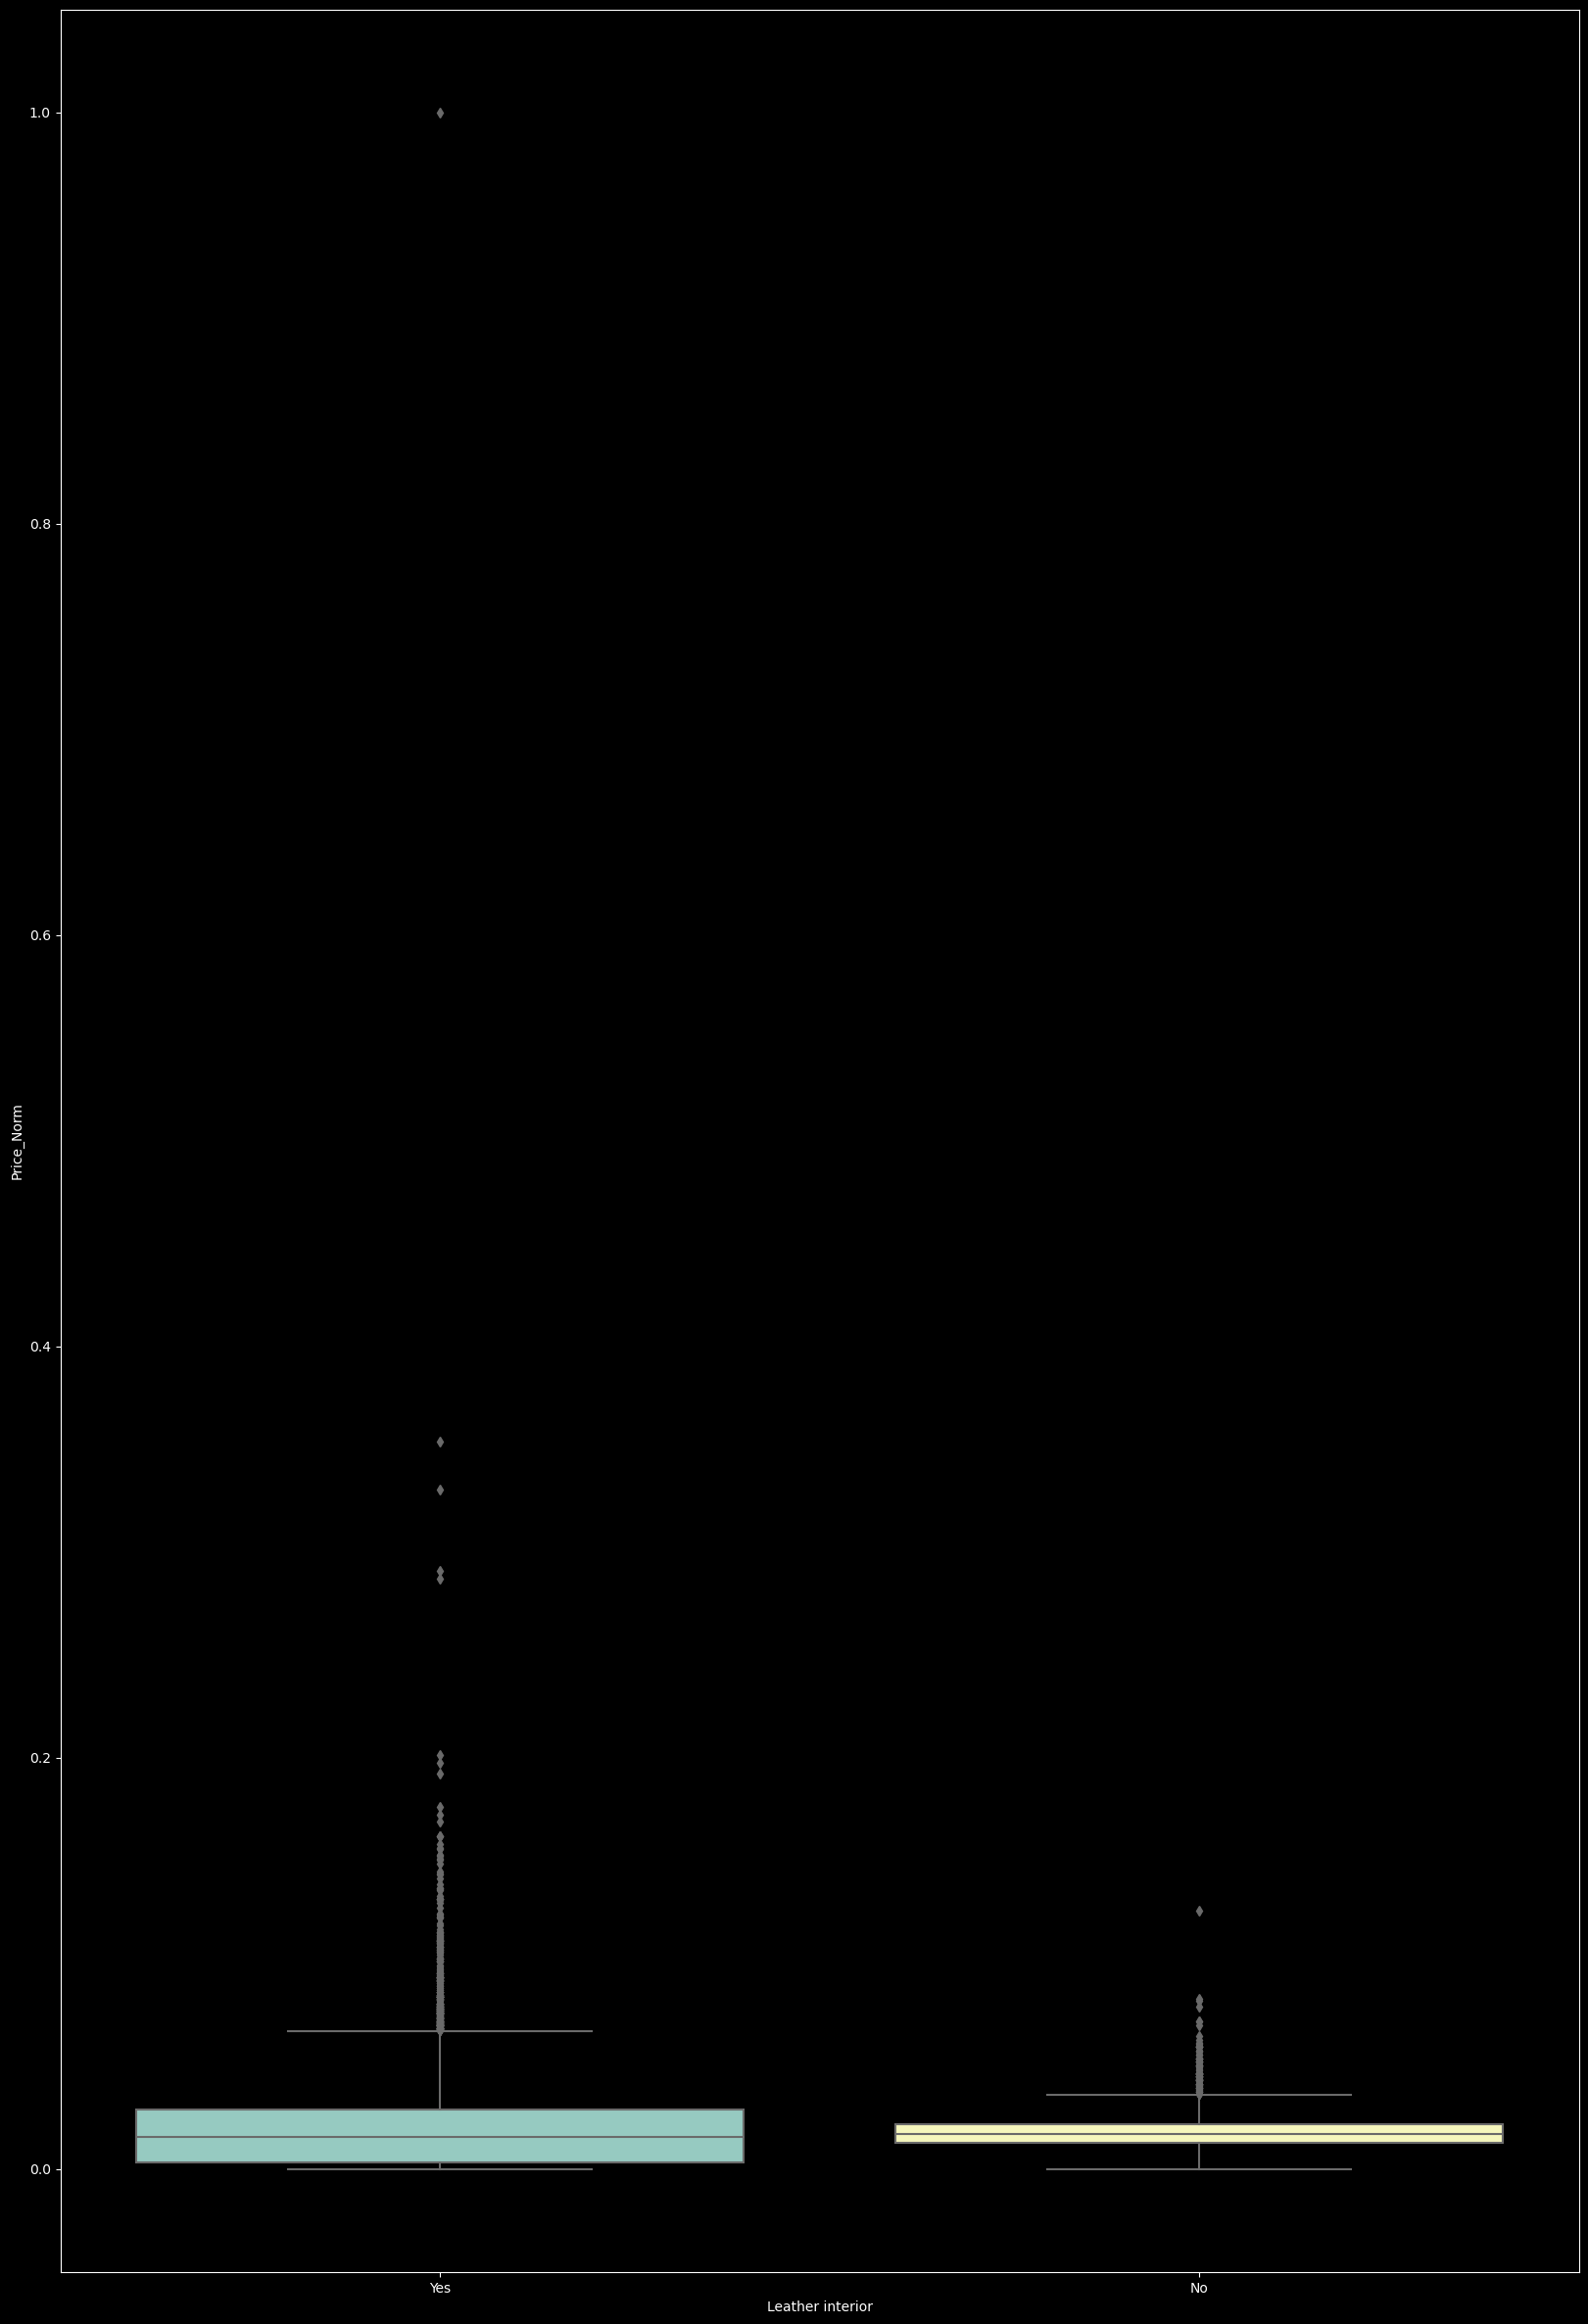

In [481]:
plt.figure(figsize = (20,30))
sns.boxplot(x = 'Leather interior', y = 'Price_Norm', data = df)

In [483]:
df['Manufacturer'].value_counts()

HYUNDAI          3468
TOYOTA           2480
MERCEDES-BENZ    1083
CHEVROLET         974
LEXUS             805
FORD              689
HONDA             534
BMW               440
SSANGYONG         438
KIA               322
VOLKSWAGEN        286
NISSAN            286
AUDI              164
SUBARU            157
MAZDA             101
JEEP               93
DAEWOO             90
OPEL               72
MITSUBISHI         64
DODGE              55
FIAT               46
JAGUAR             27
MINI               23
PORSCHE            22
SUZUKI             20
LAND ROVER         16
BUICK              15
GMC                14
CHRYSLER           13
RENAULT            11
ACURA              11
CADILLAC            9
INFINITI            7
VOLVO               5
LINCOLN             5
CITROEN             5
MASERATI            3
MERCURY             3
SCION               2
PEUGEOT             2
FERRARI             2
DAIHATSU            2
VAZ                 2
SKODA               1
LAMBORGHINI         1
BENTLEY   

In [488]:
x = df['Manufacturer']
y = df['Price_Norm']

<BarContainer object of 12872 artists>

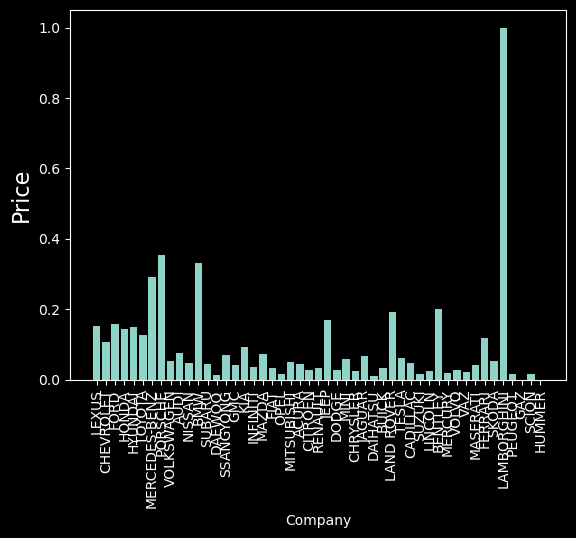

In [489]:
plt.xlabel('Company', fontsize = 10)
plt.ylabel('Price', fontsize = 16)
plt.xticks( rotation = 90)
plt.bar(x,y)

In [490]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume_L,Mileage_km,Cylinders,Gear box type,Airbags,Price_Norm,Levy_Norm
0,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,12,0.015267,0.112841
1,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,8,0.019039,0.080072
3,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,0,0.004131,0.066655
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,4,0.013432,0.030876
5,39493,891.0,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,4,0.045240,0.069149


In [496]:
x = df['Category']
y = df['Price_Norm']

<BarContainer object of 12872 artists>

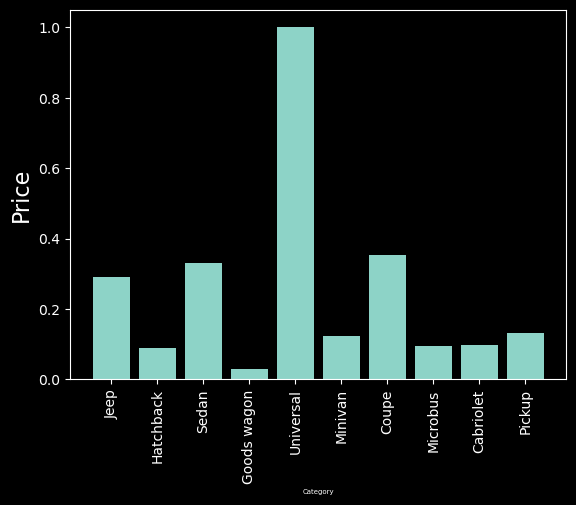

In [497]:
plt.xlabel('Category', fontsize = 5)
plt.ylabel('Price', fontsize = 16)
plt.xticks( rotation = 90)
plt.bar(x,y)

<BarContainer object of 12872 artists>

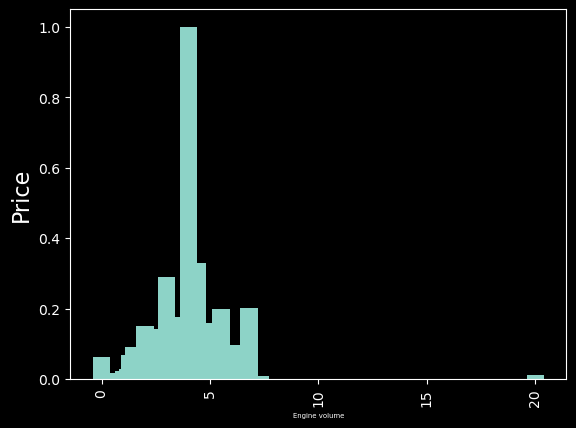

In [500]:
x = df['Engine volume_L']
y = df['Price_Norm']
plt.xlabel('Engine volume', fontsize = 5)
plt.ylabel('Price', fontsize = 16)
plt.xticks( rotation = 90)
plt.bar(x,y)

<BarContainer object of 12872 artists>

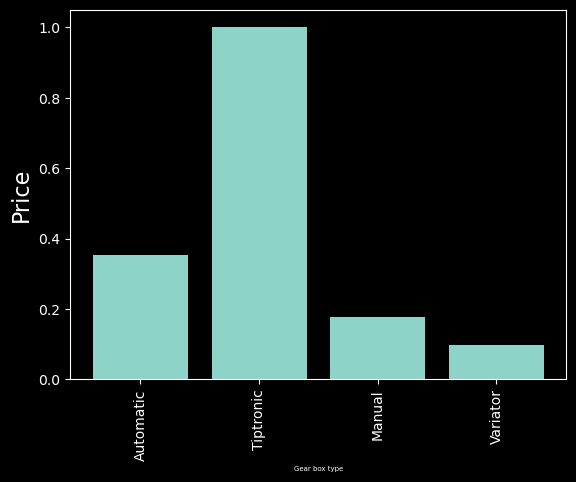

In [501]:
x = df['Gear box type']
y = df['Price_Norm']
plt.xlabel('Gear box type', fontsize = 5)
plt.ylabel('Price', fontsize = 16)
plt.xticks( rotation = 90)
plt.bar(x,y)

In [505]:
df.to_csv('processed_data.csv')